## Problem Statment : 50_startups

### Steps
##### 1:EDA
##### 2:Model(MLR) building
##### 3:VIF and Collinearity Remedy if there is collinearity
##### 4:Model Validation(QQ plot,Residual plot,Residual vs Regression)
##### 5:Model Deletion Diagonistic(Cooks Distance)
##### 6: Predicting New Data

### 1:EDA

In [1]:
#Libraries import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_profiling as pp
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
stup = pd.read_csv('50_Startups.csv')
stup.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
stup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [4]:
stup.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [5]:
stup[stup.duplicated()]#No duplicates

,R&D Spend,Administration,Marketing Spend,State,Profit


In [6]:
stup = stup.rename({'Marketing Spend':'MarketingCost','R&D Spend':'RandDCost'},axis=1)
stup.head()

,RandDCost,Administration,MarketingCost,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [7]:
report = pp.ProfileReport(stup)
report.to_widgets()

In [8]:
stup.isin([0]).any()

RandDCost          True
Administration    False
MarketingCost      True
State             False
Profit            False
dtype: bool

In [9]:
stup.isin([0]).any().any()#returns only one boolean value .if any of the column variable is true then it returns true  so we added 2 any()

True

In [10]:
0 in stup.values

True

In [11]:
stup[stup['RandDCost'].isin([0])]

,RandDCost,Administration,MarketingCost,State,Profit
47,0.0,135426.92,0.00,California,42559.73
49,0.0,116983.80,45173.06,California,14681.40


In [12]:
stup[stup['MarketingCost'].isin([0])]

,RandDCost,Administration,MarketingCost,State,Profit
19,86419.70,153514.11,0.0,New York,122776.86
47,0.00,135426.92,0.0,California,42559.73
48,542.05,51743.15,0.0,New York,35673.41


In [13]:
stup['State'].value_counts()

New York      17
California    17
Florida       16
Name: State, dtype: int64

In [14]:
#For the state categorical data as it was having 3 diff categories used dummy func to split into 3 categorical column
stup_1 = pd.get_dummies(stup,columns = ['State'])
stup_1

,RandDCost,Administration,MarketingCost,Profit,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0
5,131876.90,99814.71,362861.36,156991.12,0,0,1
6,134615.46,147198.87,127716.82,156122.51,1,0,0
7,130298.13,145530.06,323876.68,155752.60,0,1,0
8,120542.52,148718.95,311613.29,152211.77,0,0,1
9,123334.88,108679.17,304981.62,149759.96,1,0,0


In [15]:
stup_1 = stup_1.rename({'State_New York':'State_NewYork'},axis=1)
stup_1.head()

,RandDCost,Administration,MarketingCost,Profit,State_California,State_Florida,State_NewYork
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


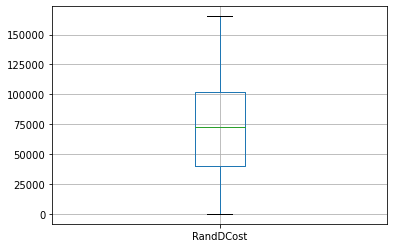

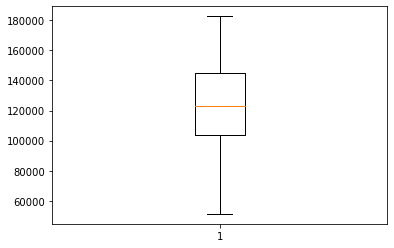

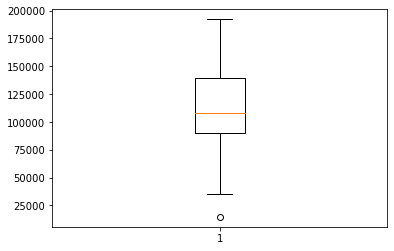

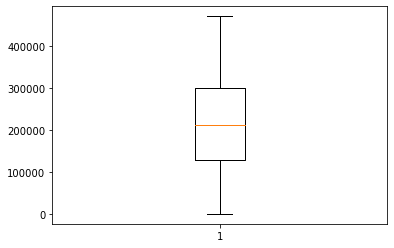

In [16]:
stup_1[['RandDCost']].boxplot()
plt.show()
plt.boxplot(stup_1['Administration'])
plt.show()
plt.boxplot(stup_1['Profit'])
plt.show()
plt.boxplot(stup_1['MarketingCost'])
plt.show()
#No outliers

##### correlation Analysis

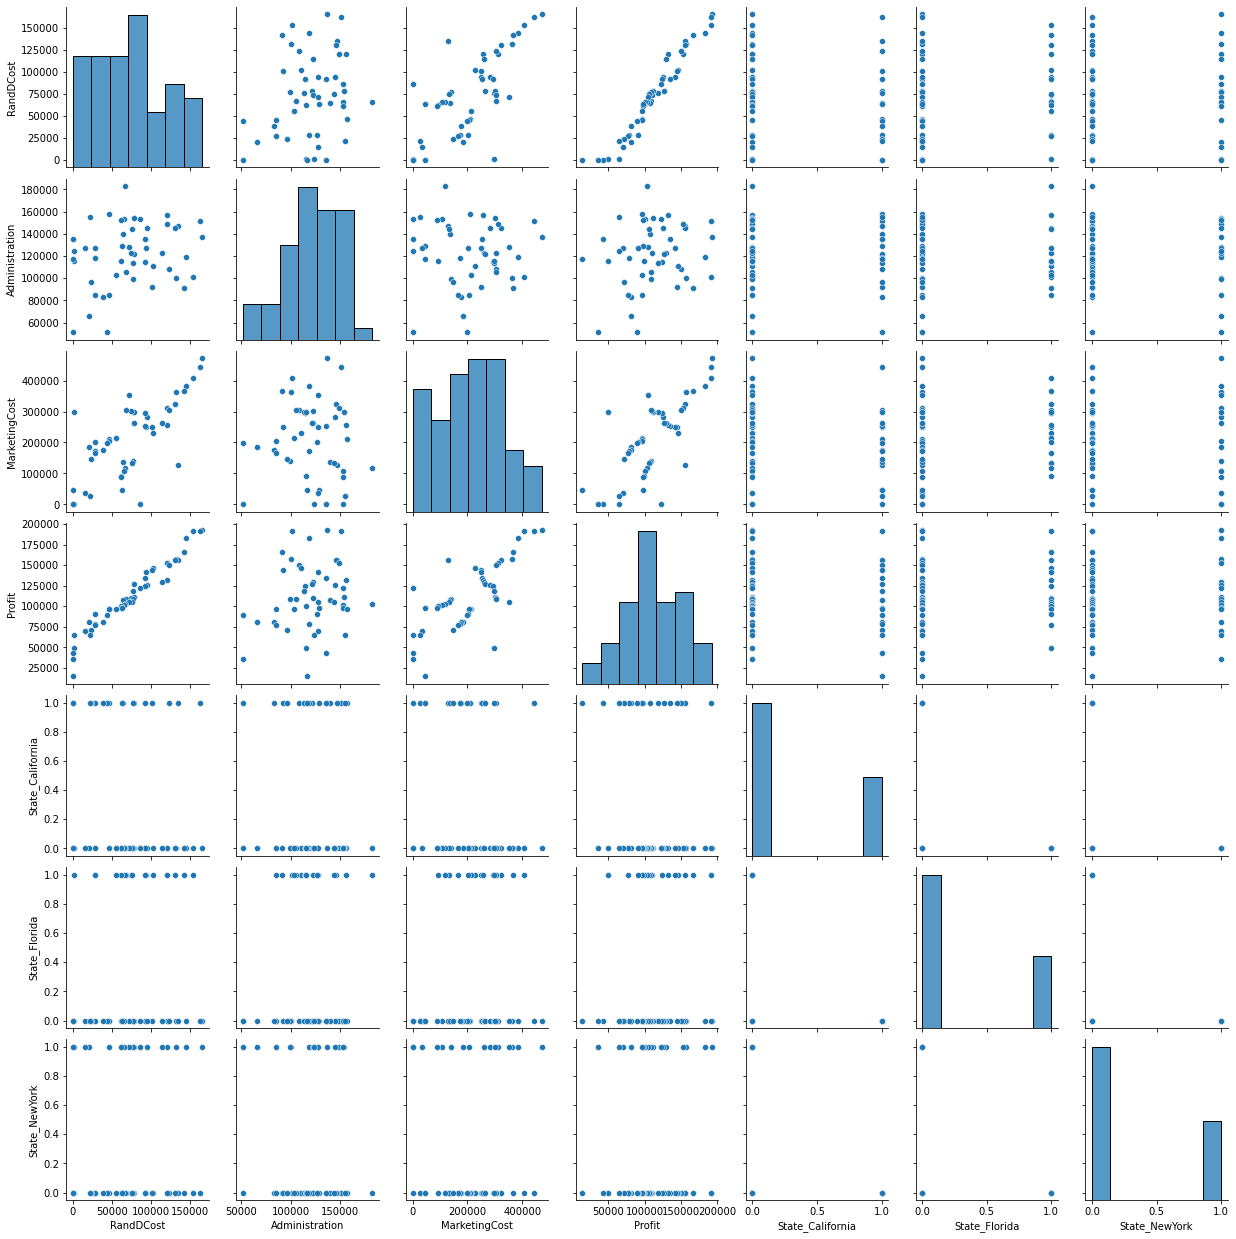

In [17]:
sns.pairplot(stup_1)

In [18]:
stup_1.corr()

,RandDCost,Administration,MarketingCost,Profit,State_California,State_Florida,State_NewYork
RandDCost,1.000000,0.241955,0.724248,0.972900,-0.143165,0.105711,0.039068
Administration,0.241955,1.000000,-0.032154,0.200717,-0.015478,0.010493,0.005145
MarketingCost,0.724248,-0.032154,1.000000,0.747766,-0.168875,0.205685,-0.033670
Profit,0.972900,0.200717,0.747766,1.000000,-0.145837,0.116244,0.031368
State_California,-0.143165,-0.015478,-0.168875,-0.145837,1.000000,-0.492366,-0.515152
State_Florida,0.105711,0.010493,0.205685,0.116244,-0.492366,1.000000,-0.492366
State_NewYork,0.039068,0.005145,-0.033670,0.031368,-0.515152,-0.492366,1.000000


<AxesSubplot:>

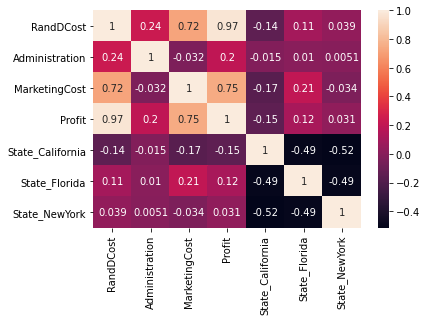

In [19]:
sns.heatmap(stup_1.corr(),annot =True)

### 2:Model(MLR) building

In [20]:
#y= Profit x='Administration,MarketingCost,R&DCost,State_California,State_Florida,State_New York'
initial_model = smf.ols('Profit~Administration+MarketingCost+RandDCost+State_California+State_Florida+State_NewYork',stup_1).fit()
initial_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Thu, 07 Oct 2021   Prob (F-statistic):           1.34e-27
Time:                        13:06:06   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         3.763e+04   5073.636      7.417      0.000    2.74e+04    4.79e+04
Administration      -0.0270      0.052     -0.517      0.608      -0.132       0.078
MarketingCost        0.0270      0.017      1.574      0.123      -0.008       0.062
RandDCost            0.8060      0.046     17.369      0.000       0.712       0.900
State_California  1.249e+04   2449.797      5.099      0.000    7554.868    1.74e+04
State_Florida     1.269e+04   2726.700      4.654      0.000    7195.596    1.82e+04
State_NewYork     1.245e+04   2486.364      5.007      0.000    7439.285    1.75e+04
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     7.09e+21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.72e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [21]:
print('Initial Model values \n\n\n Parameters ',initial_model.params,'\n\n','R square value',initial_model.rsquared,'\n\n','R square adjucent value',initial_model.rsquared_adj,'\n\n','P value',np.round(initial_model.pvalues,5))

Initial Model values 


 Parameters  Intercept           37633.233317
Administration         -0.027004
MarketingCost           0.026980
RandDCost               0.806023
State_California    12492.110514
State_Florida       12690.899307
State_NewYork       12450.223495
dtype: float64 

 R square value 0.9507524843355148 

 R square adjucent value 0.945156175737278 

 P value Intercept           0.00000
Administration      0.60774
MarketingCost       0.12268
RandDCost           0.00000
State_California    0.00001
State_Florida       0.00003
State_NewYork       0.00001
dtype: float64


In [22]:
###### As in the correlation matrix the correlation btwn Administration and MarketingCost is very less at negative side and the same result is shown in the regression model where p value is greater than 0.05 so we can perform SLR before check once with vif

In [23]:
#simple Linear Regression
ml_adm = smf.ols('Profit~Administration',data=stup_1).fit()
ml_adm.rsquared,ml_adm.rsquared_adj,np.round(ml_adm.pvalues,4)
#Administration has influence during SLR lets decide in VIF to remove or keep

(0.04028714077757245,
 0.020293122877105274,
 Intercept         0.0038
 Administration    0.1622
 dtype: float64)

In [24]:
ml_mkc = smf.ols('Profit~MarketingCost',data=stup_1).fit()
ml_mkc.rsquared,ml_mkc.rsquared_adj,np.round(ml_mkc.pvalues,4)
#Marketing cost has no influence during SLR

(0.5591535746115515,
 0.5499692740826254,
 Intercept        0.0
 MarketingCost    0.0
 dtype: float64)

In [25]:
ml_ma = smf.ols('Profit~MarketingCost+Administration+State_Florida',data=stup_1).fit()
ml_ma.rsquared,ml_ma.rsquared_adj,np.round(ml_ma.pvalues,4)


(0.6115139879150213,
 0.5861779436486096,
 Intercept         0.2537
 MarketingCost     0.0000
 Administration    0.0179
 State_Florida     0.6473
 dtype: float64)

In [26]:
ml_mal = smf.ols('Profit~Administration+MarketingCost+RandDCost+State_California',data=stup_1).fit()
ml_mal.rsquared,ml_mal.rsquared_adj,np.round(ml_mal.pvalues,4)

(0.9507466686514052,
 0.9463685947537523,
 Intercept           0.0000
 Administration      0.6056
 MarketingCost       0.1106
 RandDCost           0.0000
 State_California    0.9803
 dtype: float64)

In [27]:
## As we add new variable in the equation the p_value of Administration and Marketing cost increase where as r2 adj increases drastically

### 3:VIF and Collinearity Remedy if there is collinearity

In [28]:
#1/(1-r2)
#func to detrmine vif value
def influence_factor(r):
    return 1/(1-r)

def form_xeq(x):
    eq = ''
    for n in np.arange(len(x)):
        if(eq == ''):
            eq = x[n]
        else:
            eq = eq + '+' +x[n]
    return eq
        

def vif_model_call(x,y):
    print(y)
    print(form_xeq(x))
    eq=y+'~'+form_xeq(x)
    r = smf.ols(eq,data=stup_1).fit().rsquared
    return influence_factor(r)


array = ['Administration','MarketingCost','RandDCost','State_California','State_Florida','State_NewYork']
var = []
vifValue = []
for i in np.arange(len(array)):
    y = array[i]
    x1 = array[i+1:len(array)]
    x2 = array[:i]
    x = x1+x2
    vif = vif_model_call(x,y)
    var.append(y)
    vifValue.append(vif)

vif_list = {'Variable':var,'VifValue':vifValue}
df_vif=pd.DataFrame(vif_list)
df_vif  

Administration
MarketingCost+RandDCost+State_California+State_Florida+State_NewYork
MarketingCost
RandDCost+State_California+State_Florida+State_NewYork+Administration
RandDCost
State_California+State_Florida+State_NewYork+Administration+MarketingCost
State_California
State_Florida+State_NewYork+Administration+MarketingCost+RandDCost
State_Florida
State_NewYork+Administration+MarketingCost+RandDCost+State_California
State_NewYork
Administration+MarketingCost+RandDCost+State_California+State_Florida


<ipython-input-28-7326c55b6e40>:4: RuntimeWarning: divide by zero encountered in double_scalars
  return 1/(1-r)


,Variable,VifValue
0,Administration,1.177766
1,MarketingCost,2.416797
2,RandDCost,2.495511
3,State_California,inf
4,State_Florida,inf
5,State_NewYork,inf


### 4:Model Validation(QQ plot,Residual plot,Residual vs Regression)

#### QQ plot

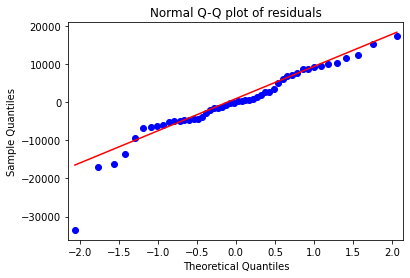

In [29]:
sm.qqplot(initial_model.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [30]:
# Finding outliers on both side
list(np.where(initial_model.resid > 20000))

[array([], dtype=int64)]

In [31]:
list(np.where(initial_model.resid < -20000))

[array([49], dtype=int64)]

In [32]:
initial_model.resid[49]#suspecting this index value might have outlier

-33503.638790438745

#### Residual Plot vs Error plot

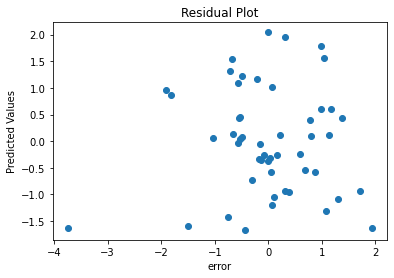

In [33]:
#(x-mean)/std
def standardization(val):
    return (val-val.mean())/val.std()

plt.scatter(standardization(initial_model.resid),standardization(initial_model.fittedvalues))
plt.title('Residual Plot')
plt.ylabel('Predicted Values')
plt.xlabel('error')
plt.show()
#No pattern no problem

#### Residual vs Regression

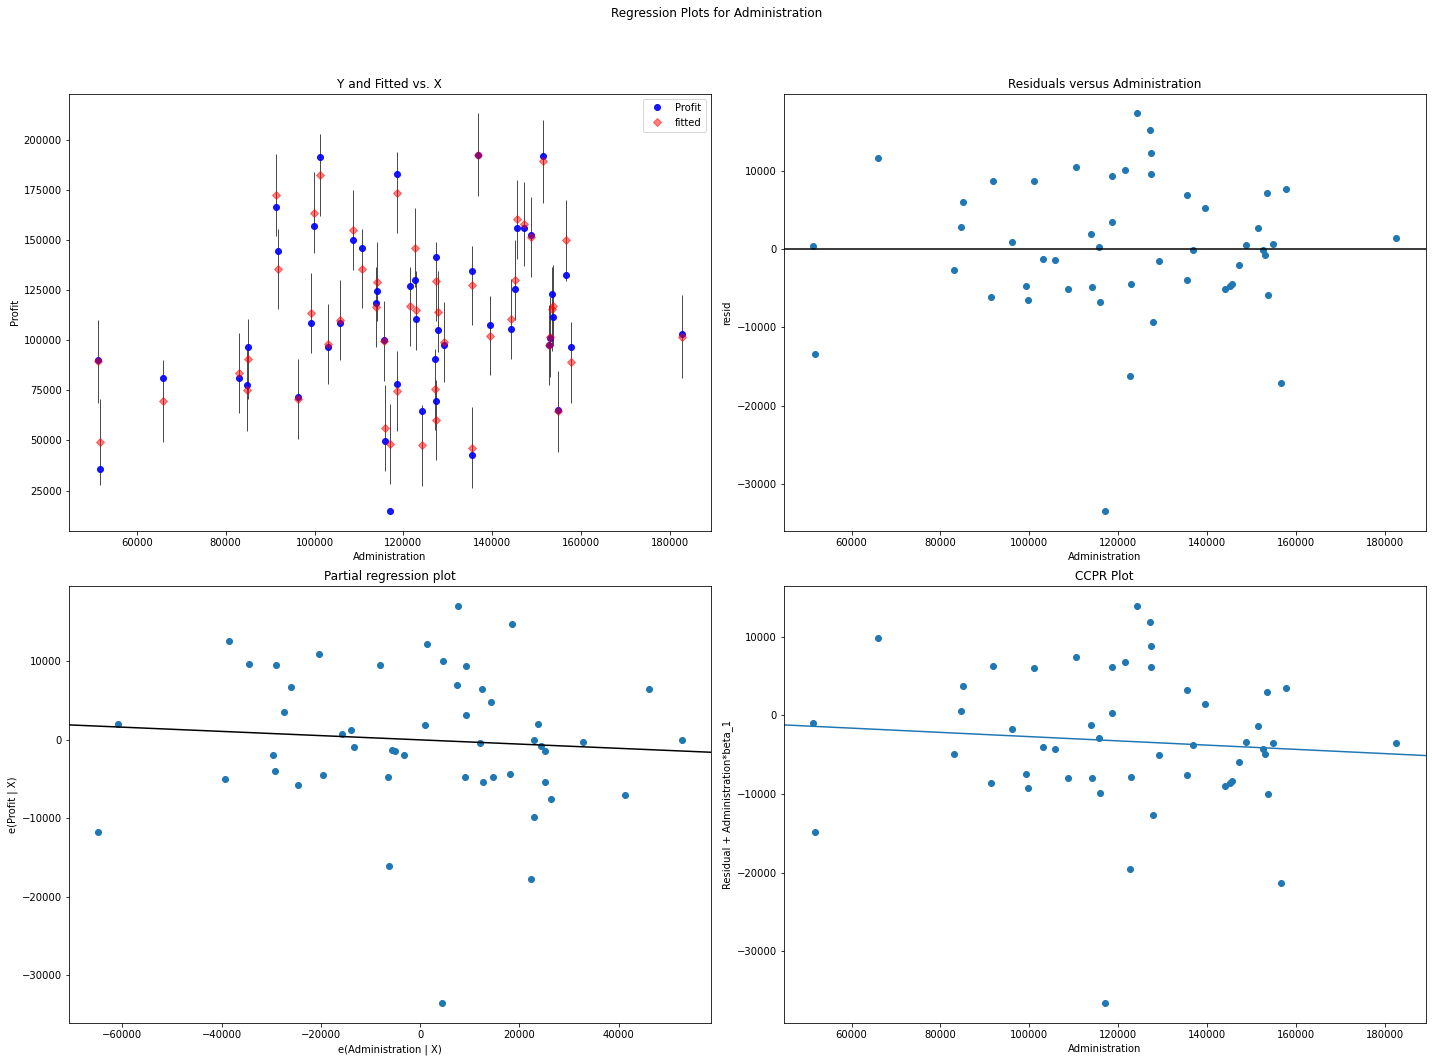

In [34]:
fig=plt.figure(figsize=(20,15))
sm.graphics.plot_regress_exog(initial_model,'Administration',fig)
plt.show()

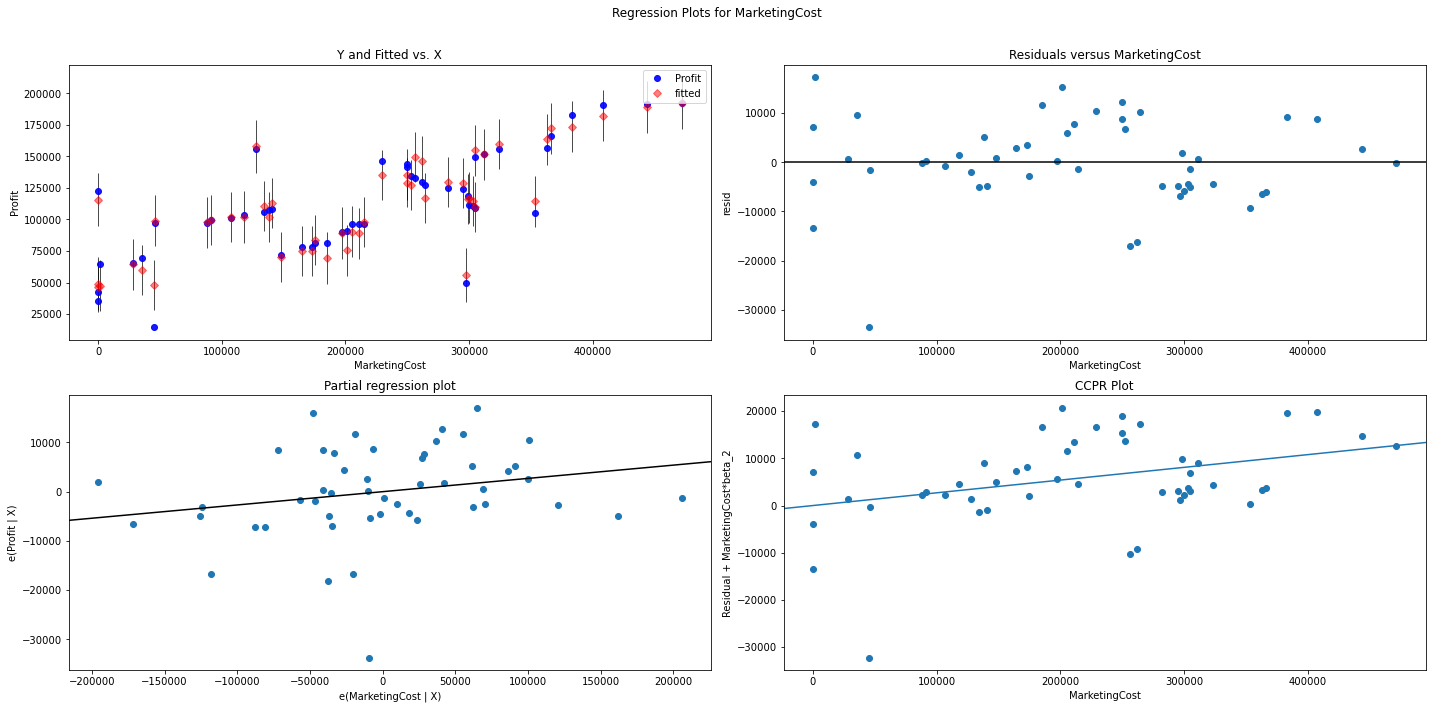

In [35]:
fig=plt.figure(figsize=(20,10))
sm.graphics.plot_regress_exog(initial_model,'MarketingCost',fig)
plt.show()

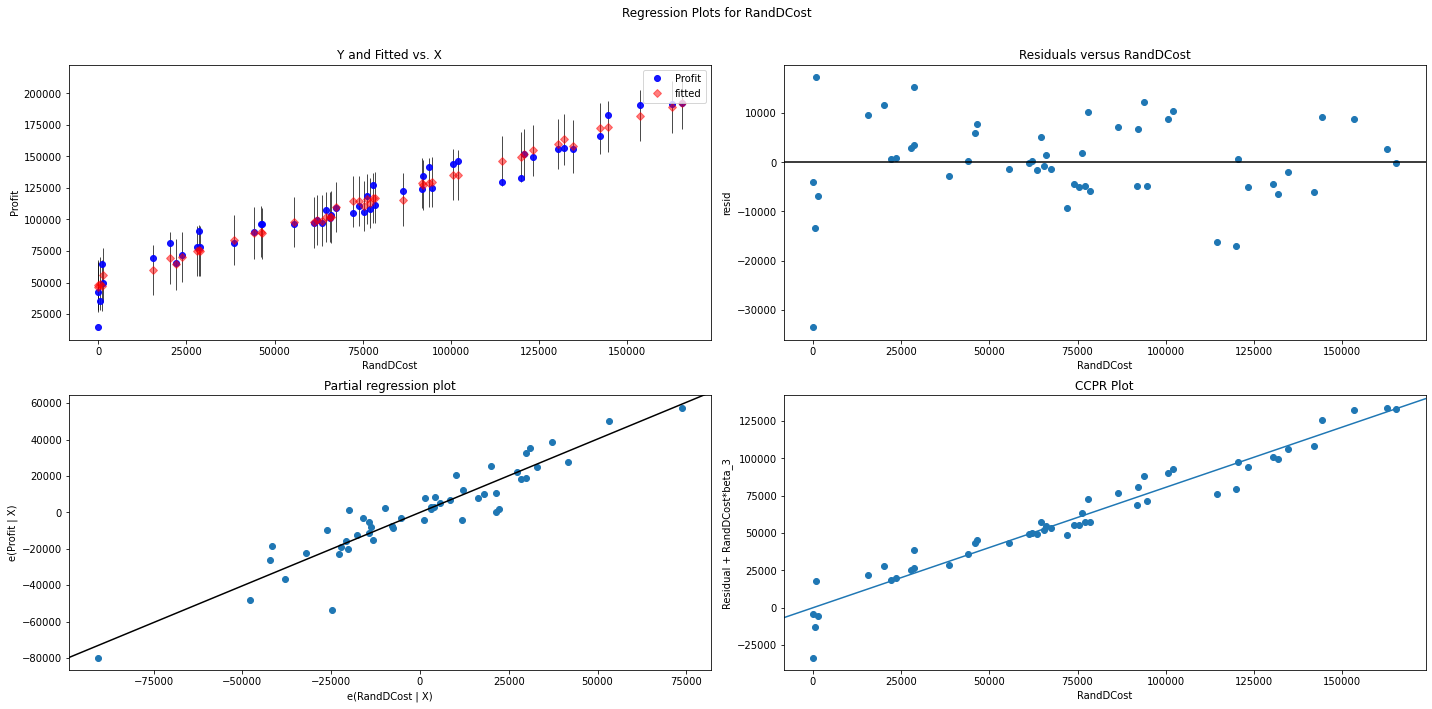

In [36]:
fig=plt.figure(figsize=(20,10))
sm.graphics.plot_regress_exog(initial_model,'RandDCost',fig)
plt.show()

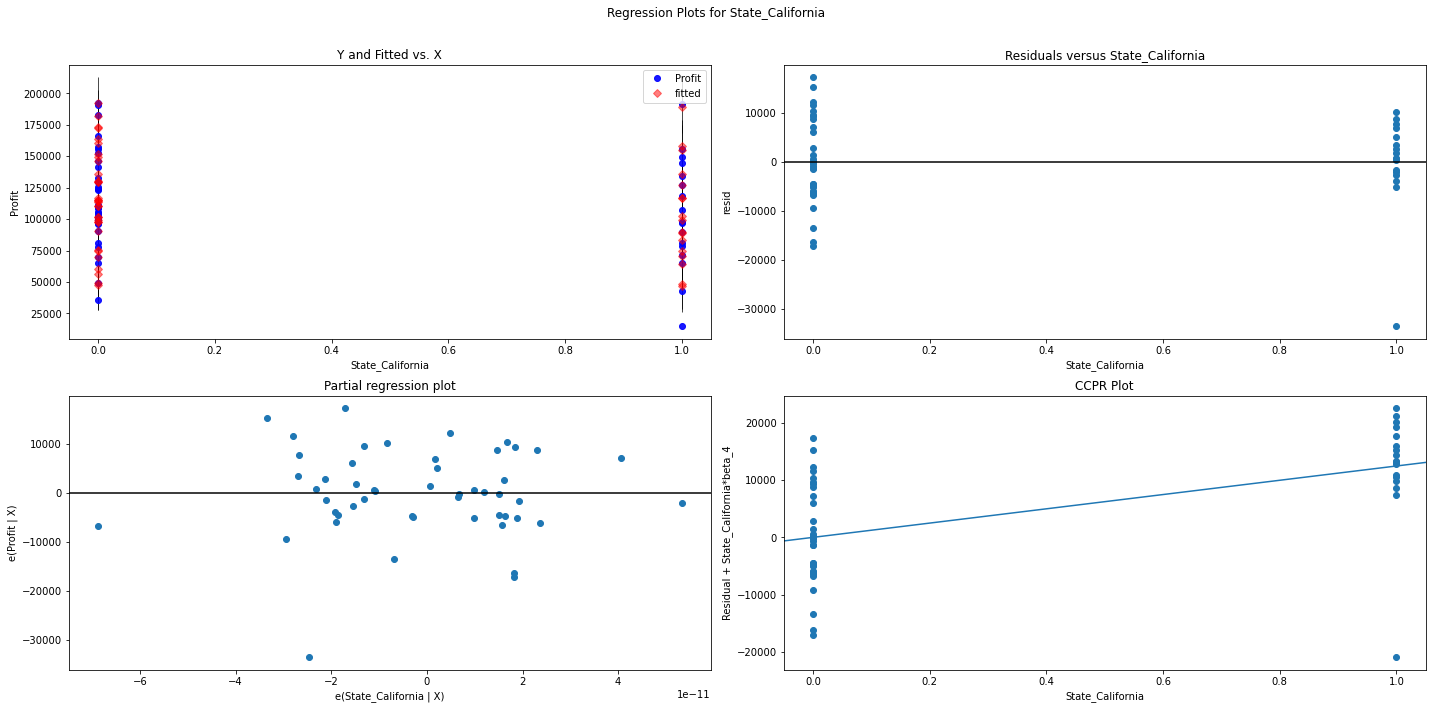

In [37]:
fig=plt.figure(figsize=(20,10))
sm.graphics.plot_regress_exog(initial_model,'State_California',fig)
plt.show()

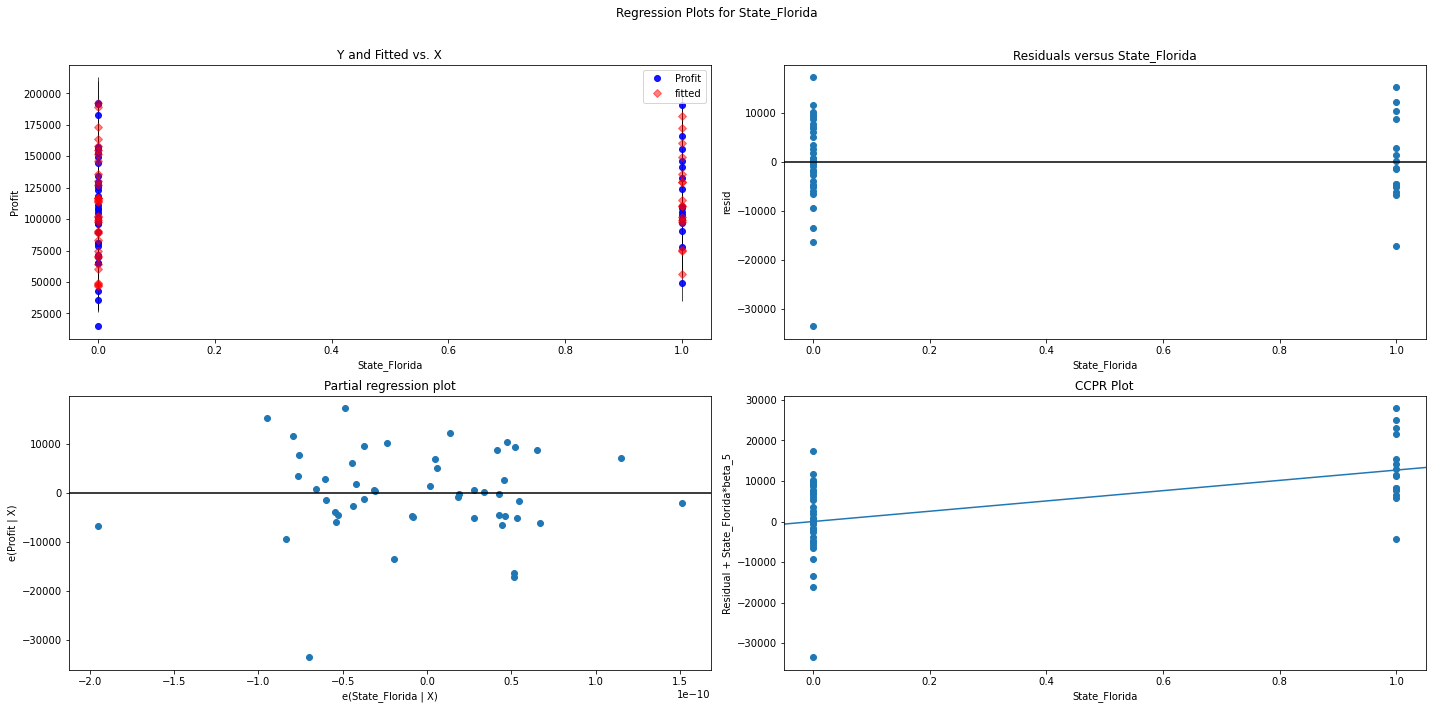

In [38]:
fig=plt.figure(figsize=(20,10))
sm.graphics.plot_regress_exog(initial_model,'State_Florida',fig)
plt.show()

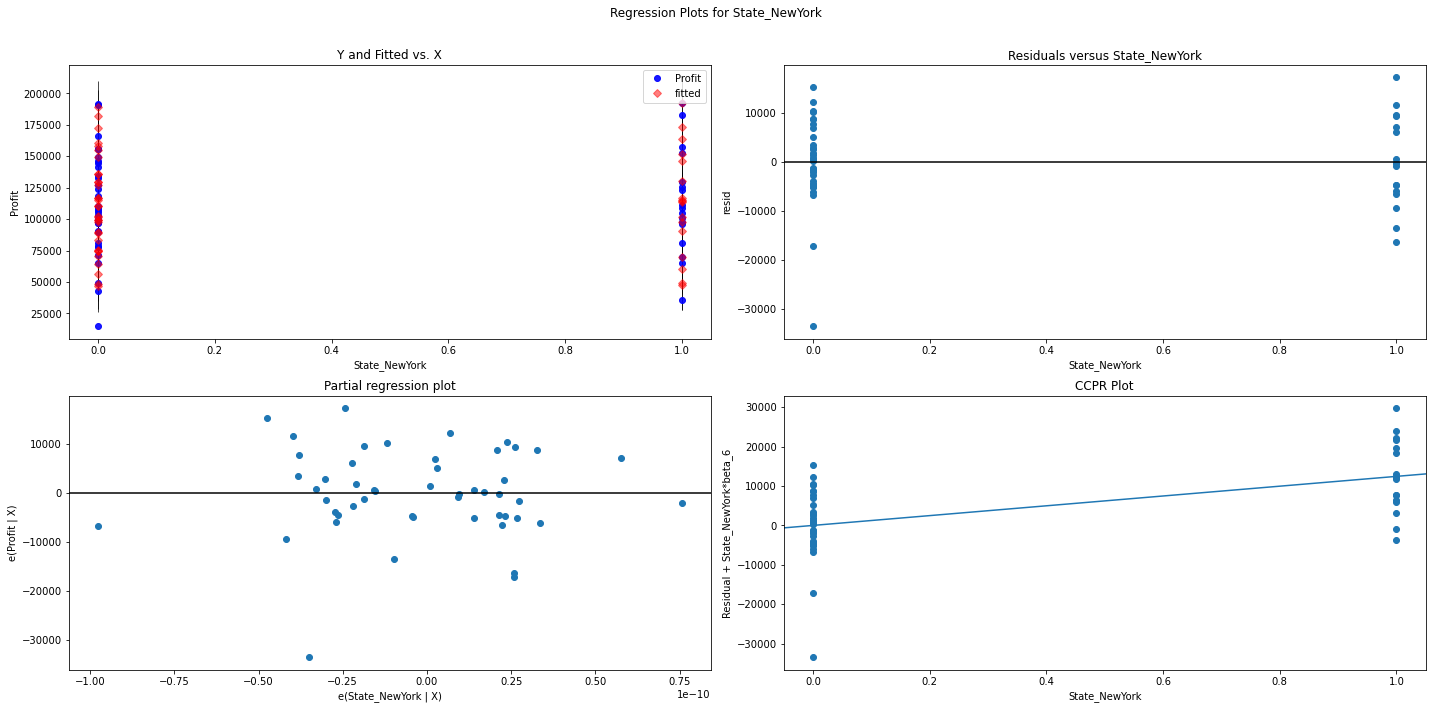

In [39]:
fig=plt.figure(figsize=(20,10))
sm.graphics.plot_regress_exog(initial_model,'State_NewYork',fig)
plt.show()

In [40]:
#for all the variables above in the residual vs regression plot the error vs variable plot is constant for all values and no pattern also

### 5:Model Deletion Diagonistic(Cooks Distance)

In [41]:
model_diag = initial_model.get_influence()
(c,_)=model_diag.cooks_distance

Text(0, 0.5, 'C value')

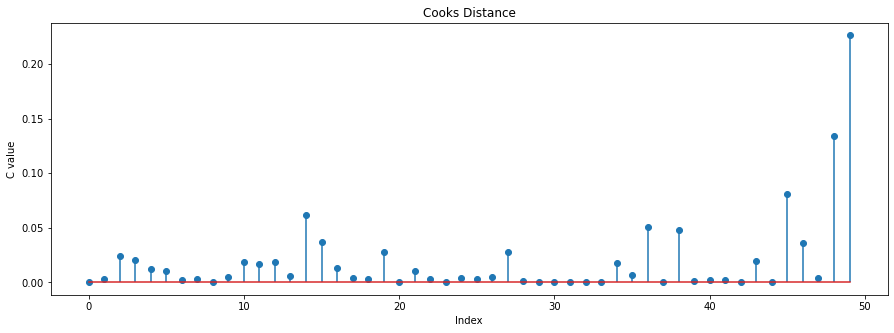

In [42]:
plt.subplots(figsize=(15,5))
plt.stem(np.arange(len(stup_1)),np.round(c,5))
plt.title('Cooks Distance')
plt.xlabel('Index')
plt.ylabel('C value')

In [43]:
np.max(c),np.argmax(c)

(0.22625094501509324, 49)

In [44]:
stup_2 = stup_1.copy()
rsq = []
rsqad = []
count =0
while np.max(c)>.20 :
    print('Maximum Cooks value in Model ----', np.max(c))
    print('Index to drop from Df---',np.argmax(c))
    if(stup_2.index.isin([np.argmax(c)]).any()):
        stup_2 = stup_2.drop(stup_2.index[np.argmax(c)],axis=0).reset_index(drop=True)
        print('Index dropped from Df---',np.argmax(c))
        final_model = smf.ols('Profit~Administration+MarketingCost+RandDCost+State_California+State_Florida+State_NewYork',stup_2).fit()
        rsq.append(final_model.rsquared)
        rsqad.append(final_model.rsquared_adj)
        count=count+1;
        (c,_)=final_model.get_influence().cooks_distance
    else:
        print('No index found to drop')
print('Final Index ',np.argmax(c),'Cooks Value',np.max(c))  
print('R squared value',final_model.rsquared,'\n\n R squared adj',final_model.rsquared_adj,'\n\n p_values',final_model.pvalues)

Maximum Cooks value in Model ---- 0.22625094501509324
Index to drop from Df--- 49
Index dropped from Df--- 49
Maximum Cooks value in Model ---- 0.2435281757140395
Index to drop from Df--- 48
Index dropped from Df--- 48
Final Index  45 Cooks Value 0.08880445606829261
R squared value 0.9628371102993712 

 R squared adj 0.9584129567635821 

 p_values Intercept           3.236978e-12
Administration      1.744892e-01
MarketingCost       2.094776e-01
RandDCost           5.070643e-24
State_California    2.683240e-09
State_Florida       1.686412e-07
State_NewYork       5.787699e-08
dtype: float64


In [60]:
RDetails = {'ModelIteration':np.arange(2,count+2),'Rsquare':rsq,'RsquareAdjusent':rsqad,}
modelRDetails_df = pd.DataFrame(RDetails)
initialR = {'ModelIteration':[1],'Rsquare':initial_model.rsquared,'RsquareAdjusent':initial_model.rsquared_adj}
initialRDetails_df =pd.DataFrame(initialR)
rDetails = pd.concat([initialRDetails_df,modelRDetails_df],ignore_index=True)
rDetails

,ModelIteration,Rsquare,RsquareAdjusent
0,1,0.950752,0.945156
1,2,0.961808,0.957367
2,3,0.962837,0.958413


Text(0, 0.5, 'C value')

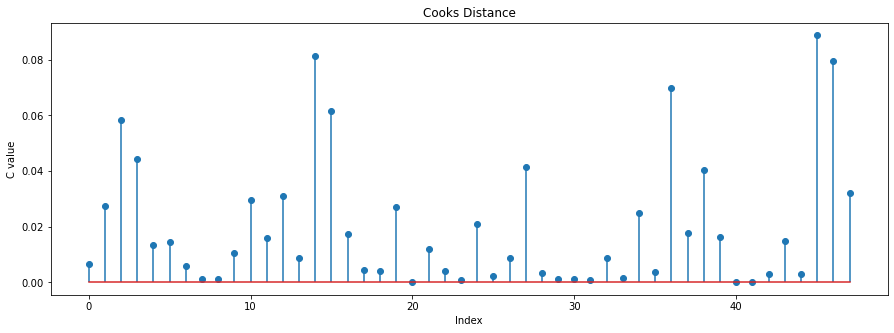

In [61]:
plt.subplots(figsize=(15,5))
plt.stem(np.arange(len(stup_2)),np.round(c,5))
plt.title('Cooks Distance')
plt.xlabel('Index')
plt.ylabel('C value')

In [62]:
np.max(c),np.argmax(c)

(0.08880445606829261, 45)

In [63]:
#### Since the cooks value is <.20 , we can stop the diagnostic process and finalize the model
finalmodel = smf.ols('Profit~Administration+MarketingCost+RandDCost+State_California+State_Florida+State_NewYork',stup_2).fit()
print('\n\n Cooks Value',np.max(c),'\n\n R squared value',finalmodel.rsquared,'\n\n Aic value',finalmodel.aic,'\n\n R squared adj',finalmodel.rsquared_adj,'\n\n p_values',np.round(finalmodel.pvalues,4))



 Cooks Value 0.08880445606829261 

 R squared value 0.9628371102993712 

 Aic value 998.4621953724801 

 R squared adj 0.9584129567635821 

 p_values Intercept           0.0000
Administration      0.1745
MarketingCost       0.2095
RandDCost           0.0000
State_California    0.0000
State_Florida       0.0000
State_NewYork       0.0000
dtype: float64


In [ ]:
#Model is improved to 88.39% i.e predicted value is 96.28% accuracy

### 6: Predicting New Data

In [67]:
newDataList = {'Administration':16000,'MarketingCost':47000,'RandDCost':30000,'State_California':0,'State_Florida':0,'State_NewYork':1}
newData = pd.DataFrame(newDataList,index=[1])
newData

,Administration,MarketingCost,RandDCost,State_California,State_Florida,State_NewYork
1,16000,47000,30000,0,0,1


In [68]:
finalmodel.predict(newData)

1    82234.426164
dtype: float64

In [69]:
#comparison of actual value and predicted value for testing purpose
actual_value = stup_2.Profit.iloc[0:10]
predicted_value = finalmodel.predict(stup_2.iloc[0:10])
listDetails = {'actual_value':actual_value,'predicted_value':predicted_value}
listOf = pd.DataFrame(listDetails)
listOf

,actual_value,predicted_value
0,192261.83,189087.074698
1,191792.06,186183.370112
2,191050.39,180288.581217
3,182901.99,172087.545967
4,166187.94,171206.768166
5,156991.12,163039.184301
6,156122.51,158709.120962
7,155752.60,157770.467620
8,152211.77,150142.259029
9,149759.96,155379.923945
